### Importing libraries.

In [1]:
import requests
import pandas as pd
import json
from datetime import datetime, timedelta

### Requesting data from NBP api.

In [2]:
url = 'http://api.nbp.pl/api/exchangerates/tables/A'

response = requests.get(url)

if response.status_code == 200:
    # Parse the JSON response
    data = response.json()
data

[{'table': 'A',
  'no': '053/A/NBP/2024',
  'effectiveDate': '2024-03-14',
  'rates': [{'currency': 'bat (Tajlandia)', 'code': 'THB', 'mid': 0.11},
   {'currency': 'dolar amerykański', 'code': 'USD', 'mid': 3.9183},
   {'currency': 'dolar australijski', 'code': 'AUD', 'mid': 2.5956},
   {'currency': 'dolar Hongkongu', 'code': 'HKD', 'mid': 0.5009},
   {'currency': 'dolar kanadyjski', 'code': 'CAD', 'mid': 2.9101},
   {'currency': 'dolar nowozelandzki', 'code': 'NZD', 'mid': 2.4168},
   {'currency': 'dolar singapurski', 'code': 'SGD', 'mid': 2.9414},
   {'currency': 'euro', 'code': 'EUR', 'mid': 4.287},
   {'currency': 'forint (Węgry)', 'code': 'HUF', 'mid': 0.010877},
   {'currency': 'frank szwajcarski', 'code': 'CHF', 'mid': 4.4538},
   {'currency': 'funt szterling', 'code': 'GBP', 'mid': 5.0214},
   {'currency': 'hrywna (Ukraina)', 'code': 'UAH', 'mid': 0.1013},
   {'currency': 'jen (Japonia)', 'code': 'JPY', 'mid': 0.026514},
   {'currency': 'korona czeska', 'code': 'CZK', 'mid': 0.

### Unpacking data from the list to get the dictionary.

In [3]:
data1= data[0]
data1

{'table': 'A',
 'no': '053/A/NBP/2024',
 'effectiveDate': '2024-03-14',
 'rates': [{'currency': 'bat (Tajlandia)', 'code': 'THB', 'mid': 0.11},
  {'currency': 'dolar amerykański', 'code': 'USD', 'mid': 3.9183},
  {'currency': 'dolar australijski', 'code': 'AUD', 'mid': 2.5956},
  {'currency': 'dolar Hongkongu', 'code': 'HKD', 'mid': 0.5009},
  {'currency': 'dolar kanadyjski', 'code': 'CAD', 'mid': 2.9101},
  {'currency': 'dolar nowozelandzki', 'code': 'NZD', 'mid': 2.4168},
  {'currency': 'dolar singapurski', 'code': 'SGD', 'mid': 2.9414},
  {'currency': 'euro', 'code': 'EUR', 'mid': 4.287},
  {'currency': 'forint (Węgry)', 'code': 'HUF', 'mid': 0.010877},
  {'currency': 'frank szwajcarski', 'code': 'CHF', 'mid': 4.4538},
  {'currency': 'funt szterling', 'code': 'GBP', 'mid': 5.0214},
  {'currency': 'hrywna (Ukraina)', 'code': 'UAH', 'mid': 0.1013},
  {'currency': 'jen (Japonia)', 'code': 'JPY', 'mid': 0.026514},
  {'currency': 'korona czeska', 'code': 'CZK', 'mid': 0.1698},
  {'curren

### Defining transform function to obtain data in more appealing format of a dataframe.

In [4]:
def transform(data):
    date= data['effectiveDate']
    df0 = pd.DataFrame(data['rates'])
    top_curr= ['USD','GBP','EUR','CHF', 'JPY']
    df1 = df0[df0['code'].isin(top_curr)]
    df1['date']= date
    df1= df1.rename(columns={'mid':'price_in_PLN'})
    df1 = df1[['date', 'code',  'price_in_PLN']]
    return df1

In [5]:
transform(data1)

/var/folders/d0/pqbkcx1n1xdgb1wp7tg9h9br0000gn/T/ipykernel_85452/3155813812.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date']= date


,date,code,price_in_PLN
1,2024-03-14,USD,3.918300
7,2024-03-14,EUR,4.287000
9,2024-03-14,CHF,4.453800
10,2024-03-14,GBP,5.021400
12,2024-03-14,JPY,0.026514


### Requesting data from last 10 (recorded) days.

In [6]:
url = 'http://api.nbp.pl/api/exchangerates/tables/a/last/10'
print

response = requests.get(url)

if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

### Defining new function to Transform data for multiple dates.

In [7]:
def ten_days_concat(data_json):
    # Initialize an empty list to store DataFrames
    dfs = []
    for n in data_json:
        df = transform(n)
        dfs.append(df)

    # Concatenate all DataFrames in the list
    ten_days = pd.concat(dfs, ignore_index=True)
    
    return ten_days

### Assingining results to new variable

In [8]:
ten_days_df=ten_days_concat(data)

/var/folders/d0/pqbkcx1n1xdgb1wp7tg9h9br0000gn/T/ipykernel_85452/3155813812.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date']= date
/var/folders/d0/pqbkcx1n1xdgb1wp7tg9h9br0000gn/T/ipykernel_85452/3155813812.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date']= date
/var/folders/d0/pqbkcx1n1xdgb1wp7tg9h9br0000gn/T/ipykernel_85452/3155813812.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [9]:
ten_days_df

,date,code,price_in_PLN
0,2024-03-01,USD,3.992200
1,2024-03-01,EUR,4.317600
2,2024-03-01,CHF,4.509900
3,2024-03-01,GBP,5.041300
4,2024-03-01,JPY,0.026502
5,2024-03-04,USD,3.982000
6,2024-03-04,EUR,4.320100
7,2024-03-04,CHF,4.511900
8,2024-03-04,GBP,5.048000
9,2024-03-04,JPY,0.026504


### Importing pandaSQL (having installed it before) for the convience of using SQL queries inside a python notebook.

In [1]:
import pandasql as ps

#### `ten_days_df` can now be used as a table from which we may querry data.

### Examples:

Looking for records of specific currency:

In [ ]:
ps.sqldf("""
         SELECT
            date, code, price_in_PLN
         FROM
            ten_days_df
         WHERE
            code = 'USD'
         """)

,date,code,price_in_PLN
0,2024-02-29,USD,3.9803
1,2024-03-01,USD,3.9922
2,2024-03-04,USD,3.9820
3,2024-03-05,USD,3.9838
4,2024-03-06,USD,3.9630
5,2024-03-07,USD,3.9485
6,2024-03-08,USD,3.9392
7,2024-03-11,USD,3.9262
8,2024-03-12,USD,3.9162
9,2024-03-13,USD,3.9269


Retreving record for specific date:

In [ ]:
random_date = ten_days_df['date'].sample(n=1).iloc[0]

ps.sqldf(f"""
    SELECT
        date, code, price_in_PLN
    FROM
        ten_days_df
    WHERE
        date = '{random_date}'
""")


,date,code,price_in_PLN
0,2024-03-07,USD,3.948500
1,2024-03-07,EUR,4.304500
2,2024-03-07,CHF,4.482700
3,2024-03-07,GBP,5.033600
4,2024-03-07,JPY,0.026682


Calculating average price for each currency.

In [ ]:
ps.sqldf(f"""
    SELECT
        code,
        AVG(price_in_PLN) as 'average price in PLN'
    FROM
        ten_days_df
    GROUP BY
        code
    ORDER BY
       AVG(price_in_PLN)  DESC
""")


,code,average price in PLN
0,GBP,5.038500
1,CHF,4.492550
2,EUR,4.306580
3,USD,3.955830
4,JPY,0.026588


#### The data may be visualized using matplotlib.pyplot and seaborn library.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Exchange rates for last 10 business days')

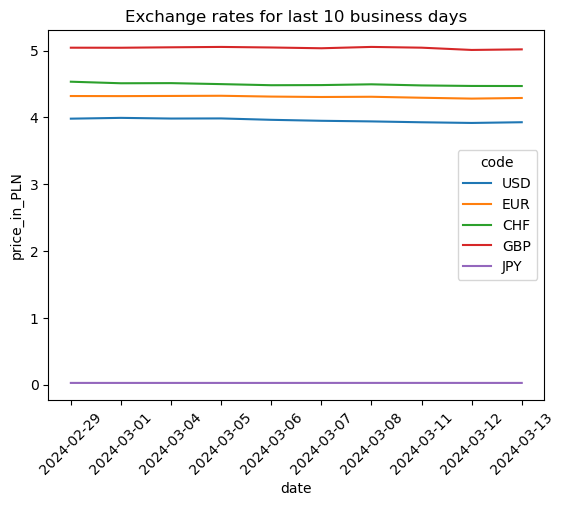

In [ ]:
sns.lineplot(data=ten_days_df, x='date', y='price_in_PLN', hue='code')
plt.xticks(rotation=45)
plt.title('Exchange rates for last 10 business days')

/var/folders/d0/pqbkcx1n1xdgb1wp7tg9h9br0000gn/T/ipykernel_84772/2296687344.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/d0/pqbkcx1n1xdgb1wp7tg9h9br0000gn/T/ipykernel_84772/2296687344.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/d0/pqbkcx1n1xdgb1wp7tg9h9br0000gn/T/ipykernel_84772/2296687344.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/d0/pqbkcx1n1xdgb1wp7tg9h9br0000gn/T/ipykernel_84772/2296687344.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/d0/pqbkcx1n1xdgb1wp7tg9h9br0000gn/T/ipykernel_84772/2296687344.py:16: UserWarning: FixedFormatter should only be used together with

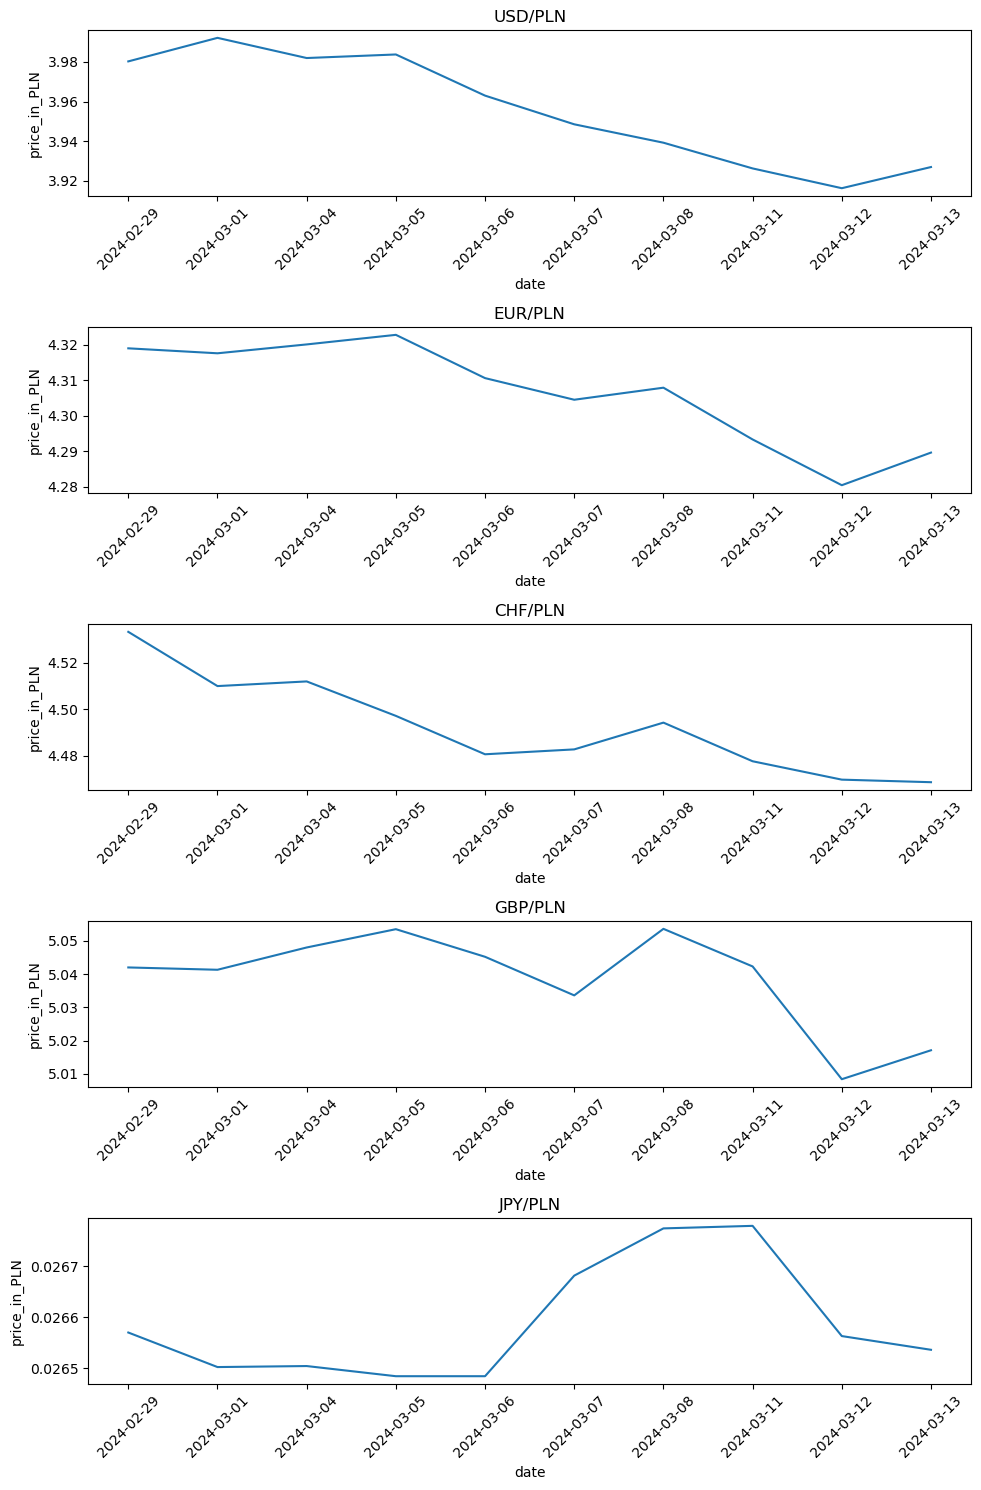

In [ ]:
# Determine the number of rows and columns for the subplot matrix
num_rows = 5
num_cols = 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 15))

# Assuming ten_days_df is already defined
codes = ten_days_df['code'].unique()

# Loop through each unique code and plot on a separate subplot
for i, code in enumerate(codes):
    ax = axes[i]
    sns.lineplot(data=ten_days_df[ten_days_df['code']==code], x='date', y='price_in_PLN', ax=ax)
    ax.set_title(f'{code}/PLN')  # Set title for each subplot
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

#### Data frame can be saved, for convinence of keeping everything in this notebook it will be saved in .csv file

In [ ]:
today= datetime.now().strftime('%Y-%m-%d')
today

ten_days_df.to_csv(f'{today}_ten_days_rate.csv', index=False)

If the one day data api request was run daily .csv could have been update with the code below. However .api request already contains latest data thus it would not be neccessarry and the code has been commented out.

In [ ]:

# with open('example.csv', 'w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerows(data)
